In [1]:
import pandas as pd
import numpy as np
import seaborn
import time
from prefixSpan import prefix_span
from gsp import gsp
from data_loader import importDatabase
import matplotlib.pyplot as plt
import random
import subprocess
import os


random.seed(42)

In [2]:
#database paths
bible = "dataSets5K/BIBLE5K.txt"
leviathan = "dataSets5K/LEVIATHAN5K.txt"
korsak = "dataSets5K/KOSARAK5K.txt"

In [3]:
def process_output(path):
    length_counts = {}
    with open(path, 'r') as file:
        for line in file:
            line = line.replace(" -1", "")
            sequence = line.strip().split()
            length = len(sequence) - 2
            if length in length_counts:
                length_counts[length] = length_counts[length] + 1
            else:
                length_counts[length] = 1
    return length_counts

In [4]:
# sequance length and n of frequent sequencses vs supp threshold
test_support_thresholds = np.linspace(0.3, 2, 5)
database_paths = [bible, leviathan, korsak]
#databases = [random.sample(importDatabase(path), 1000) for path in database_paths]
databases = [importDatabase(path) for path in database_paths]
names = ["BIBLE5K", "LEVIATHAN5K", "KOSARAK5K"]

seq_length = []
n_of_frequent = []
supp_thresholds = []
database_name = []

for th in test_support_thresholds:
    for db, name in zip(databases, names):
        print(f"testing threshod={th}% for {name}")
        command = f"java -jar spmf.jar run PrefixSpan dataSets5k/{name}.txt output.txt {th}%"
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        process.wait()
        process.communicate()
        length_counts = process_output("output.txt")
        os.remove("output.txt") 

        if len(length_counts) > 1:
            for key, value in length_counts.items():
                seq_length.append(key)
                n_of_frequent.append(value)
                supp_thresholds.append(th)
                database_name.append(name)

database_stats = pd.DataFrame({"Length of sequence": seq_length, 
                            "support threshold [%]": supp_thresholds, 
                            "Number of frequent sequences": n_of_frequent,
                            "database": database_name})

testing threshod=0.3% for BIBLE5K
testing threshod=0.3% for LEVIATHAN5K
testing threshod=0.3% for KOSARAK5K
testing threshod=0.725% for BIBLE5K
testing threshod=0.725% for LEVIATHAN5K
testing threshod=0.725% for KOSARAK5K
testing threshod=1.15% for BIBLE5K
testing threshod=1.15% for LEVIATHAN5K
testing threshod=1.15% for KOSARAK5K
testing threshod=1.575% for BIBLE5K
testing threshod=1.575% for LEVIATHAN5K
testing threshod=1.575% for KOSARAK5K
testing threshod=2.0% for BIBLE5K
testing threshod=2.0% for LEVIATHAN5K
testing threshod=2.0% for KOSARAK5K


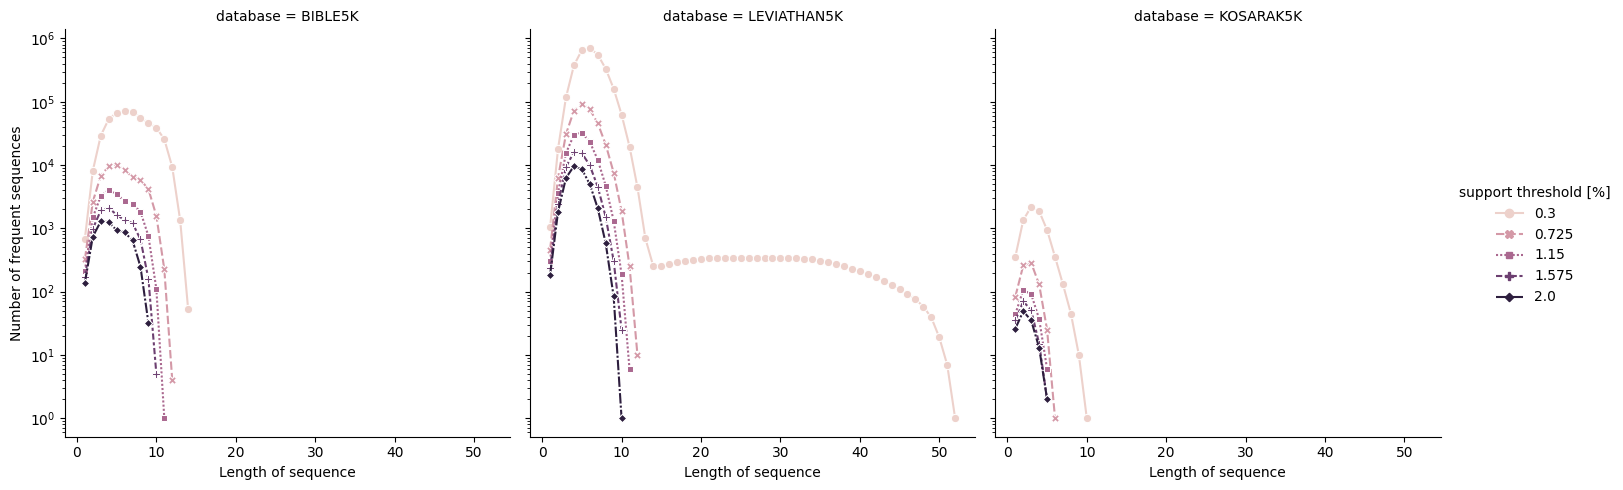

In [7]:
# plot results 
seaborn.relplot(data=database_stats,
                 x="Length of sequence",
                 y="Number of frequent sequences", 
                 hue="support threshold [%]",
                 style="support threshold [%]",
                 col = "database",
                 kind="line",
                 markers=True
                )
#plt.title("execution time vs support theshold for 1000 sequences from Bible")
plt.yscale('log')

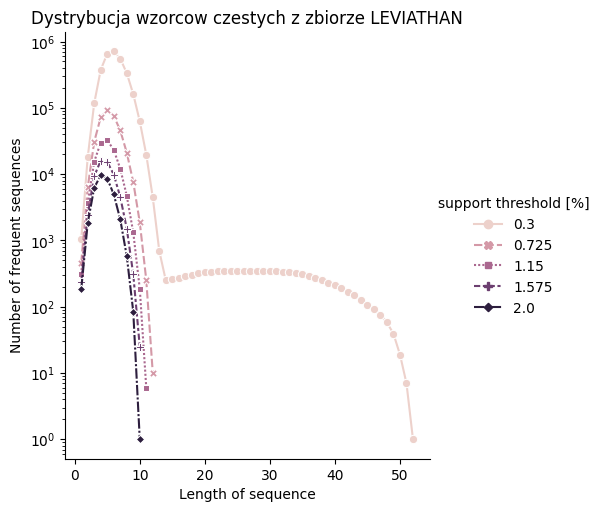

In [11]:
# plot results 
dataset_name = "BIBLE5K"
dataset_name = "KOSARAK5K"
dataset_name = "LEVIATHAN5K"

seaborn.relplot(data=database_stats[database_stats["database"] == dataset_name],
                 x="Length of sequence",
                 y="Number of frequent sequences", 
                 hue="support threshold [%]",
                 style="support threshold [%]",
                 #col = "database",
                 kind="line",
                 markers=True
                )
plt.title(f"Dystrybucja wzorcow czestych z zbiorze {dataset_name[:-2]}")
plt.yscale('log')